In [4]:
import numpy as np
import pandas as pd

In [5]:
ataques = pd.read_csv('..\Ataques_original_proyecto.csv')
ataques

,Edad,Genero,Antecedentes familiares,Nivel de estres,Sintomas,Severidad,Impacto en la vida,Apoyo social,Nivel de ansiedad
0,38,0,0,1,3,0,0,2,1
1,51,0,0,2,4,0,0,2,3
2,32,1,1,2,4,0,2,1,1
3,64,1,0,1,2,1,1,2,2
4,31,0,1,1,4,0,1,0,3
...,...,...,...,...,...,...,...,...,...
119995,31,1,1,2,2,1,1,1,3
119996,27,0,0,2,4,0,1,2,3
119997,21,1,0,0,0,1,2,1,2
119998,28,0,0,1,0,0,2,1,2


In [6]:
X = ataques.drop('Nivel de ansiedad', axis=1)
y = ataques['Nivel de ansiedad']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [9]:
rnd_clf.fit(X_test, y_test)

RandomForestClassifier(random_state=42)

In [10]:
y_pred_RFC = rnd_clf.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matrixRFC = confusion_matrix(y_test, y_pred_RFC)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrixRFC)

Matriz de Confusión:
[[11311     7     3     0]
 [   55  4073    21     0]
 [    7     1  7827     3]
 [    0     0     5   687]]


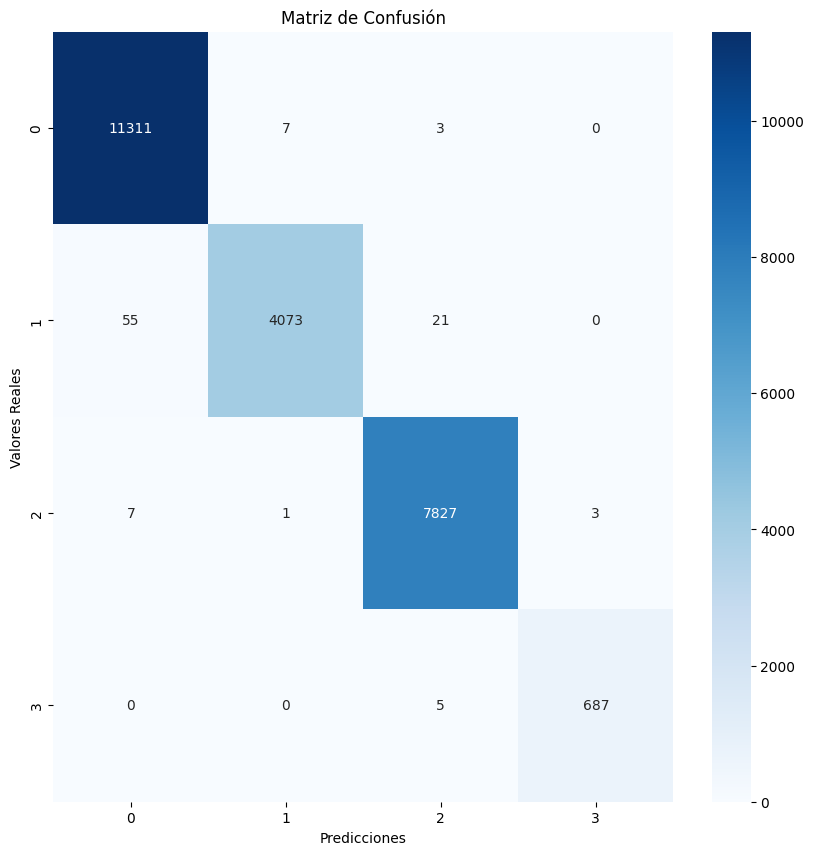

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrixRFC, annot=True, fmt='d', cmap='Blues')

plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

In [13]:
accuracyConf = accuracy_score(y_test, y_pred_RFC)
print("Precisión (Accuracy): {:.2f}%".format(accuracyConf*100))

Precisión (Accuracy): 99.58%


In [14]:
import joblib

In [15]:
joblib.dump(rnd_clf, 'Random_Forest_Classifier_model_230810.pkl')

['Random_Forest_Classifier_model_230810.pkl']